In [7]:
import sys
from time import time
sys.path.append("tools/")
from email_preprocess import preprocess

Use a Naive Bayes Classifier to identify emails by their authors

authors and labels:
Sara has label 0
Chris has label 1    

+ : Good for texts, fast
- : lower accuracy

In [13]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess('tools/word_data.pkl', 'tools/email_authors.pkl')

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [10]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

t0 = time()
pred = clf.fit(features_train, labels_train).predict(features_test)
print "training time:", round(time()-t0, 3), "s"

from sklearn.metrics import accuracy_score
score = accuracy_score(labels_test, pred)
print "accuracy : ", score

training time: 0.224 s
accuracy :  0.920364050057


Use a Decision Tree Classifier to identify emails by their authors

information gain = entropy(parent) - [weighted average](entropy children)
+ : maximize information gain
- : slow

In [12]:
from sklearn import tree

clf  = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
pred = clf.fit(features_train, labels_train).predict(features_test)
print "training time:", round(time()-t0, 3), "s"


from sklearn.metrics import accuracy_score
print accuracy_score(labels_test, pred)

training time: 5.129 s
0.967007963595


Use a SVM to identify emails from the Enron corpus by their authors

GridCV for tuning parametrs

+: accuracy 
-: low labels count, slow

In [14]:
f_train, f_test, l_train, l_test = preprocess('tools/word_data.pkl', 'tools/email_authors.pkl')

f_train = f_train[:len(features_train)/100] #to speed up processing
l_train = l_train[:len(labels_train)/100] 

from sklearn import svm
clf = svm.SVC(kernel='rbf', C=10000.0)

t0 = time()
pred = clf.fit(f_train, l_train).predict(f_test)
print "training time:", round(time()-t0, 3), "s"

from sklearn.metrics import accuracy_score
score = accuracy_score(labels_test, pred)
print "accuracy : ", score

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 0.099 s
accuracy :  0.880546075085


Linear Regression

y = slope * x + intercept

- minimizes squared errors
- allows to look on data and see some correlations

score =  -1.48499241737
slope =  [ 5.44814029]
intercept =  -102360.543294
slope =  [ 2.27410114]


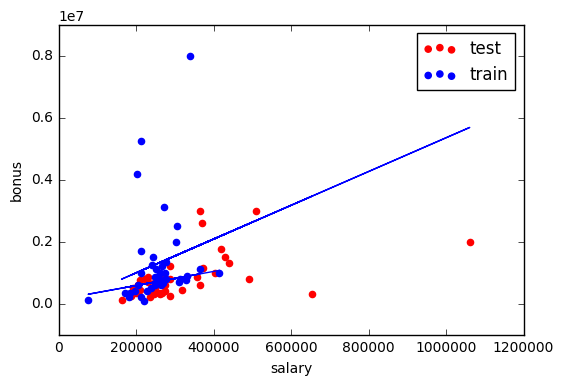

In [16]:
import pickle

from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("final_project_dataset_modified.pkl", "r") )

### list the features 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

print "score = ", reg.score(feature_test, target_test)
print "slope = ", reg.coef_
print "intercept = ", reg.intercept_

### scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### regression line
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 
print "slope = ", reg.coef_

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()